## Clasificación de dígitos escritos a mano


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

### Descargar el conjunto de datos

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Exploración de los datos


In [3]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [6]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [7]:
# Reescalar  imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
print('Valor mínimo: ',x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [9]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

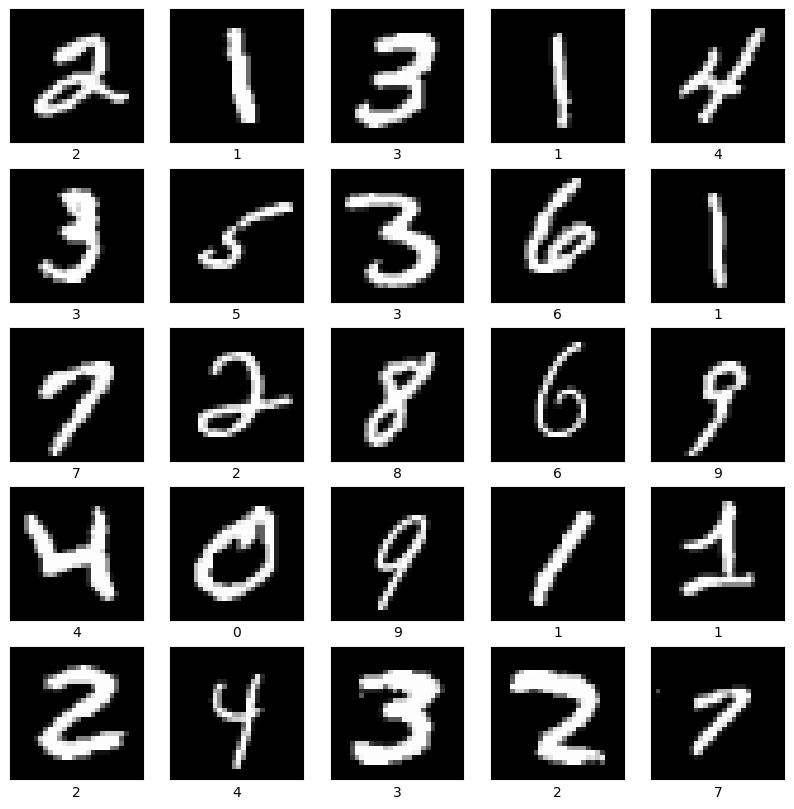

In [10]:
visualize_dataset(5,x_train[5:30,:],y_train[5:30])

In [11]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()


Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


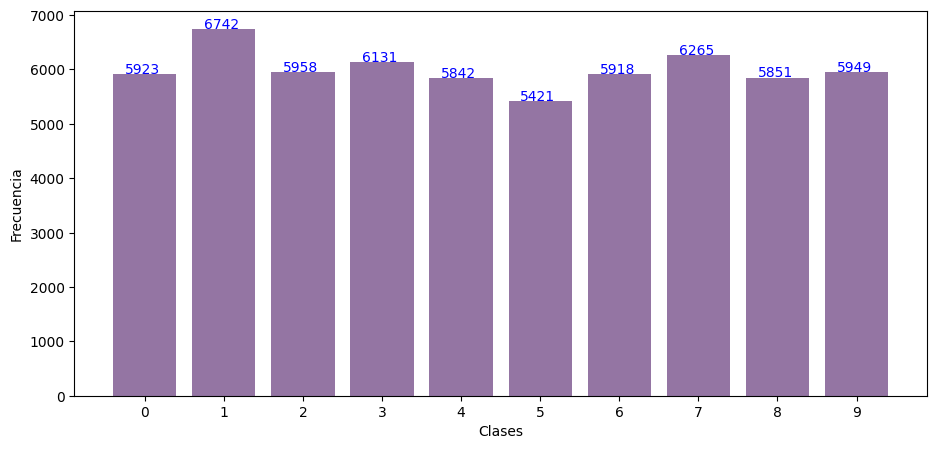

In [12]:
visualize_labels(y_train, True)

### Definición del modelo

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


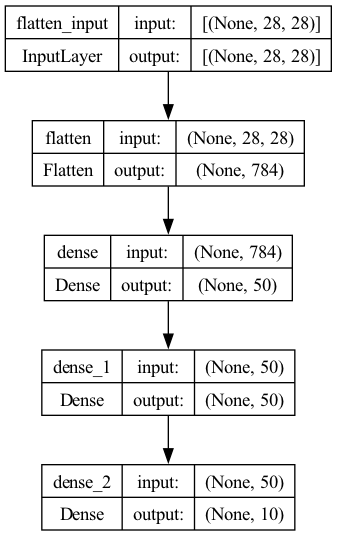

In [16]:
plot_model(model, show_shapes=True)

In [17]:
es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_Mnist.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')


### Entrenamiento del modelo


In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es, checkpoint] ,epochs=200,verbose=1)

Epoch 1/200
1784/1875 [===========================>..] - ETA: 0s - loss: 0.3175 - accuracy: 0.9089
Epoch 1: val_loss improved from inf to 0.17518, saving model to best_model_Mnist.h5
1875/1875 [==============================] - 1s 638us/step - loss: 0.3105 - accuracy: 0.9111 - val_loss: 0.1752 - val_accuracy: 0.9498
Epoch 2/200
 311/1875 [===>..........................] - ETA: 0s - loss: 0.1465 - accuracy: 0.9561

/Users/fernankiwi/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1860/1875 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9568
Epoch 2: val_loss improved from 0.17518 to 0.13891, saving model to best_model_Mnist.h5
1875/1875 [==============================] - 1s 571us/step - loss: 0.1439 - accuracy: 0.9568 - val_loss: 0.1389 - val_accuracy: 0.9584
Epoch 3/200
1870/1875 [============================>.] - ETA: 0s - loss: 0.1078 - accuracy: 0.9668
Epoch 3: val_loss improved from 0.13891 to 0.12005, saving model to best_model_Mnist.h5
1875/1875 [==============================] - 1s 568us/step - loss: 0.1078 - accuracy: 0.9668 - val_loss: 0.1201 - val_accuracy: 0.9632
Epoch 4/200
1855/1875 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.9735
Epoch 4: val_loss improved from 0.12005 to 0.10388, saving model to best_model_Mnist.h5
1875/1875 [==============================] - 1s 545us/step - loss: 0.0875 - accuracy: 0.9734 - val_loss: 0.1039 - val_accuracy: 0.9685
Epoch 5/200
1783/1875 [=======================

### Evaluación del modelo

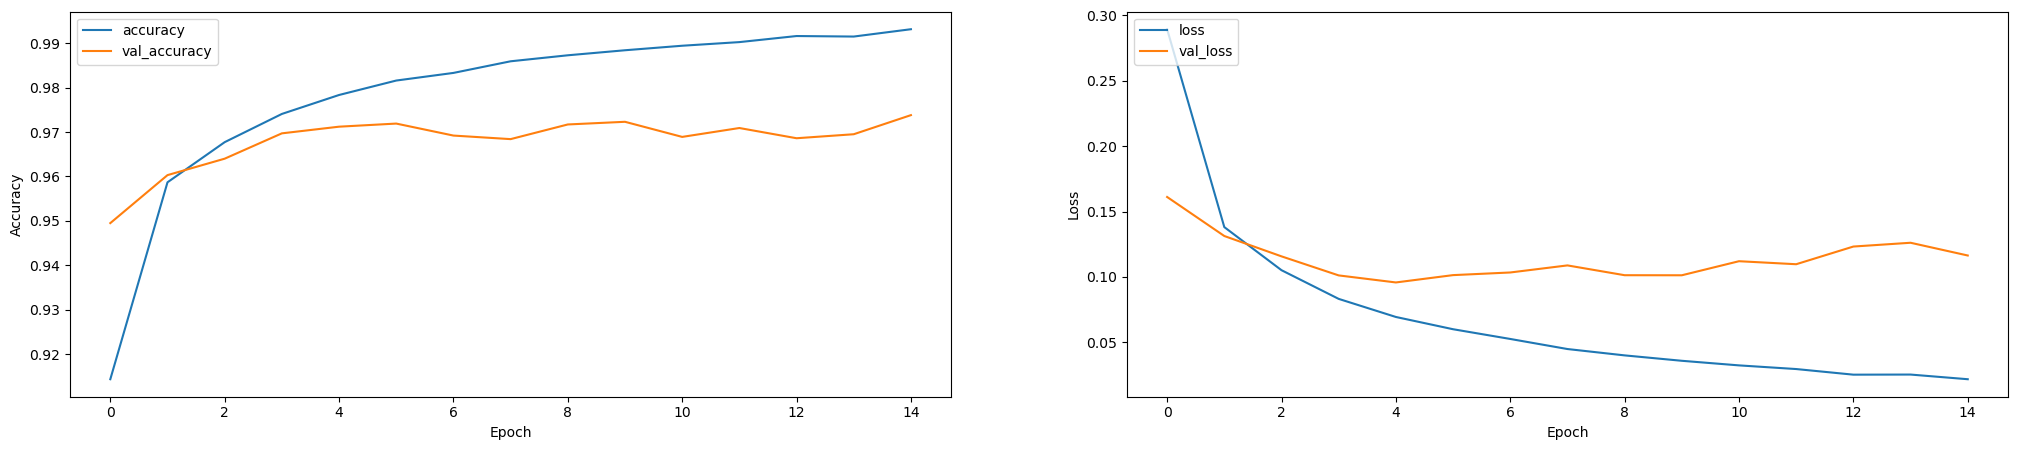

In [23]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.97
Test loss: 0.12


In [26]:
#from tensorflow.keras.models import load_model

In [27]:
#perceptron = load_model('simple_model.h5')

In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [29]:
y_pred

array([[5.6830248e-12, 4.6391797e-09, 1.9266018e-08, ..., 1.0000000e+00,
        2.0070984e-14, 1.9014313e-11],
       [4.7127801e-18, 1.6097022e-04, 9.9983776e-01, ..., 1.6624342e-16,
        5.0323651e-12, 1.0166905e-17],
       [4.7539117e-12, 9.9996424e-01, 4.2015165e-07, ..., 2.9809815e-05,
        4.8095599e-06, 2.2190672e-08],
       ...,
       [7.2810992e-17, 9.9549783e-15, 1.8582318e-22, ..., 9.9461125e-12,
        7.4400704e-14, 3.2057262e-10],
       [6.7765744e-11, 5.6377260e-12, 3.4030623e-09, ..., 5.7364773e-12,
        4.6170139e-06, 2.2997933e-15],
       [2.9530542e-15, 1.1617378e-16, 4.4720165e-14, ..., 8.0443137e-21,
        4.6395320e-17, 3.6012904e-22]], dtype=float32)

In [30]:
print(y_pred[1])

[4.7127801e-18 1.6097022e-04 9.9983776e-01 5.3915119e-11 1.1677907e-10
 5.0761628e-11 1.1799114e-06 1.6624342e-16 5.0323651e-12 1.0166905e-17]


In [31]:
# Suma de las salidas de softmax
print(np.sum(y_pred[1]))

0.99999994


In [32]:
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Matriz de confusión

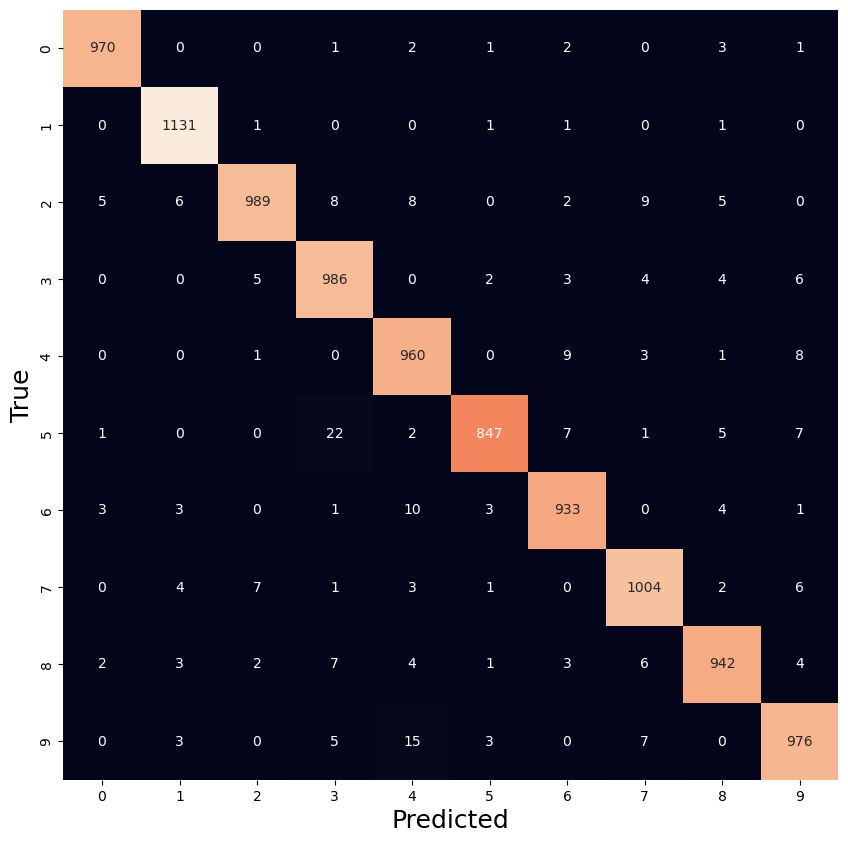

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [36]:
def plot_prediction(index):
    print('Valor real: ',y_test[index])
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  9
Predicción:  9


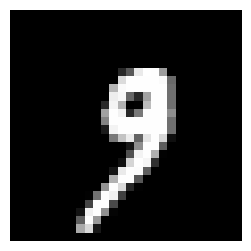

In [39]:
i = 1000
plot_prediction(i)